In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.tree as st
import sklearn.model_selection as sm

In [95]:
df = pd.read_excel("Bank Data for case study assignment.xlsx", header=0)
df.shape

(1021, 8)

In [96]:
description = df.describe(include = 'all')
description

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
count,1021.000000,1019,1020,1020,1020,1019,1019,1021
unique,NaN,12,3,4,2,3,2,2
top,NaN,blue-collar,married,secondary,no,yes,no,no
freq,NaN,217,617,524,998,583,869,897
mean,41.066601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,10.400013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.dropna(inplace=True)
df.shape

(1013, 8)

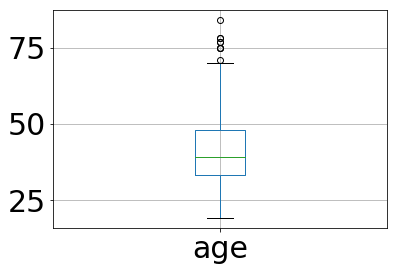

In [98]:
df.boxplot(column='age', fontsize=30)

In [99]:
df.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

In [100]:
desc = df["marital status "].describe()
print(desc)
df["marital status "].unique()

count        1013
unique          3
top       married
freq          612
Name: marital status , dtype: object


array(['married', 'single', 'divorced'], dtype=object)

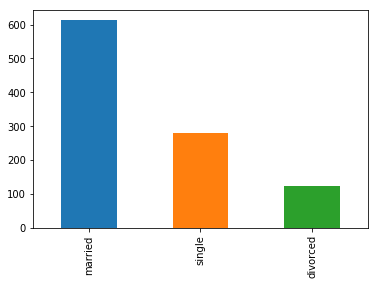

In [101]:
#df.plot(y='marital status ', kind='hist')
fig, ax = plt.subplots()
df['marital status '].value_counts().plot(ax=ax, kind='bar')

In [102]:
desc = df["job"].describe()
print(desc)
df["job"].unique()

count            1013
unique             12
top       blue-collar
freq              217
Name: job, dtype: object


array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

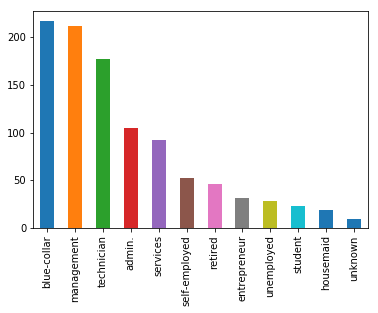

In [103]:
fig, ax = plt.subplots()
df['job'].value_counts().plot(ax=ax, kind='bar')

In [104]:
df = df[df['job'] != 'unknown']
df['job'].value_counts()

blue-collar      217
management       212
technician       177
admin.           105
services          92
self-employed     52
retired           46
entrepreneur      32
unemployed        28
student           23
housemaid         19
Name: job, dtype: int64

In [105]:
desc = df["education"].describe()
print(desc)
df["education"].unique()

count          1003
unique            4
top       secondary
freq            517
Name: education, dtype: object


array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

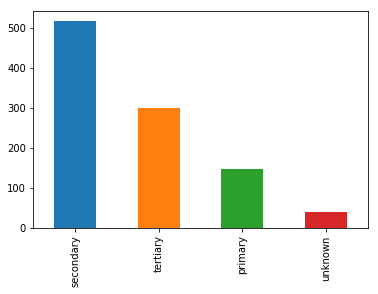

In [106]:
fig, ax = plt.subplots()
df['education'].value_counts().plot(ax=ax, kind='bar')

In [107]:
df = df[df['education'] != 'unknown']
df['education'].value_counts()

secondary    517
tertiary     299
primary      148
Name: education, dtype: int64

In [108]:
desc = df["credit default?"].describe()
print(desc)
df["credit default?"].unique()

count     964
unique      2
top        no
freq      945
Name: credit default?, dtype: object


array(['no', 'yes'], dtype=object)

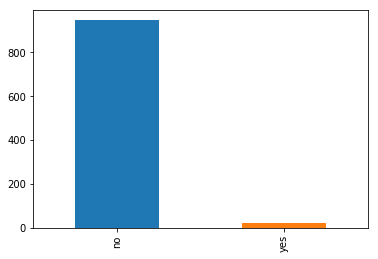

In [109]:
fig, ax = plt.subplots()
df['credit default?'].value_counts().plot(ax=ax, kind='bar')

In [110]:
desc = df["housing loan?"].describe()
print(desc)
df["housing loan?"].unique()

count     964
unique      3
top       yes
freq      561
Name: housing loan?, dtype: object


array(['no', 'yes', 'xxxyy'], dtype=object)

yes      561
no       402
xxxyy      1
Name: housing loan?, dtype: int64


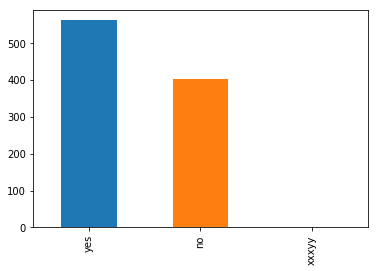

In [111]:
print(df['housing loan?'].value_counts())
fig, ax = plt.subplots()
df['housing loan?'].value_counts().plot(ax=ax, kind='bar')

In [112]:
df = df[df['housing loan?'] != 'xxxyy']
df['housing loan?'].value_counts()

yes    561
no     402
Name: housing loan?, dtype: int64

In [113]:
desc = df["Personal loan"].describe()
print(desc)
df["Personal loan"].unique()

count     963
unique      2
top        no
freq      817
Name: Personal loan, dtype: object


array(['no', 'yes'], dtype=object)

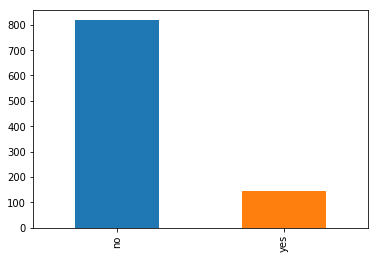

In [114]:
fig, ax = plt.subplots()
df['Personal loan'].value_counts().plot(ax=ax, kind='bar')

In [115]:
desc = df["y"].describe()
print(desc)
df["y"].unique()

count     963
unique      2
top        no
freq      847
Name: y, dtype: object


array(['no', 'yes'], dtype=object)

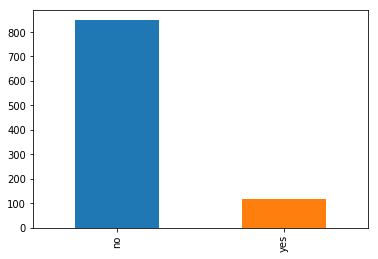

In [116]:
fig, ax = plt.subplots()
df['y'].value_counts().plot(ax=ax, kind='bar')

In [117]:
df.columns
feature_cols = ['age', 'job', 'marital status ', 'education', 'credit default?', 'housing loan?', 'Personal loan']
feature_df=df[feature_cols]
target_var=df['y']
feature_df,target_var

(      age            job marital status   education credit default?  \
 0      30     unemployed         married    primary              no   
 1      33       services         married  secondary              no   
 2      35     management          single   tertiary              no   
 3      30     management         married   tertiary              no   
 4      59    blue-collar         married  secondary              no   
 5      35     management          single   tertiary              no   
 6      36  self-employed         married   tertiary              no   
 7      39     technician         married  secondary              no   
 8      41   entrepreneur         married   tertiary              no   
 9      43       services         married    primary              no   
 10     39       services         married  secondary              no   
 11     43         admin.         married  secondary              no   
 12     36     technician         married   tertiary            

In [118]:
X_train, X_test, y_train, y_test = sm.train_test_split(feature_df, target_var, test_size = 0.3, random_state = 9)
X_train

,age,job,marital status,education,credit default?,housing loan?,Personal loan
478,35,services,married,secondary,no,yes,no
347,55,management,married,primary,no,no,no
11,43,admin.,married,secondary,no,yes,no
503,19,student,single,primary,no,no,no
208,38,services,single,secondary,no,yes,no
192,30,management,single,tertiary,no,no,no
475,57,blue-collar,married,primary,no,yes,no
521,50,entrepreneur,married,secondary,no,no,no
612,37,admin.,married,tertiary,no,no,no
73,41,services,married,tertiary,no,yes,no


In [119]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
balanced_data = df.apply(le.fit_transform)
balanced_data

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,11,10,1,0,0,0,0,0
1,14,7,1,1,0,1,1,0
2,16,4,2,2,0,1,0,0
3,11,4,1,2,0,1,1,0
4,40,1,1,1,0,1,0,0
5,16,4,2,2,0,0,0,0
6,17,6,1,2,0,1,0,0
7,20,9,1,1,0,1,0,0
8,22,2,1,2,0,1,0,0
9,24,7,1,0,0,1,1,0


In [120]:
df.columns
feature_cols = ['age', 'job', 'marital status ', 'education', 'credit default?', 'housing loan?', 'Personal loan']
feature_df=balanced_data[feature_cols]
target_var=balanced_data['y']
feature_df,target_var

(      age  job  marital status   education  credit default?  housing loan?  \
 0      11   10                1          0                0              0   
 1      14    7                1          1                0              1   
 2      16    4                2          2                0              1   
 3      11    4                1          2                0              1   
 4      40    1                1          1                0              1   
 5      16    4                2          2                0              0   
 6      17    6                1          2                0              1   
 7      20    9                1          1                0              1   
 8      22    2                1          2                0              1   
 9      24    7                1          0                0              1   
 10     20    7                1          1                0              1   
 11     24    0                1          1         

In [121]:
import sklearn as sk
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(feature_df, target_var, test_size = 0.3, random_state = 9)
X_train

,age,job,marital status,education,credit default?,housing loan?,Personal loan
478,16,7,1,1,0,1,0
347,36,4,1,0,0,0,0
11,24,0,1,1,0,1,0
503,0,8,2,0,0,0,0
208,19,7,2,1,0,1,0
192,11,4,2,2,0,0,0
475,38,1,1,0,0,1,0
521,31,2,1,1,0,0,0
612,18,0,1,2,0,0,0
73,22,7,1,2,0,1,0


In [128]:
clf = st.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [129]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [130]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8339100346020761


In [131]:
df.shape

(963, 8)